# SQL Kunskapskontroll

In [1]:
!pip install sqlalchemy
!pip install pyodbc

In [2]:
from sqlalchemy import create_engine, MetaData, Table, inspect
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats

In [3]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        assert user, 'You must define a username'
        assert password, 'You must define a password'
    print(eng)
    return create_engine(eng)

In [4]:
engine = create_engine("mssql://Raqi/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server")

In [5]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [6]:
connection = engine.connect()

# Query 1 - Production.WorkOrder

In [7]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


In [8]:
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [9]:
df = pd.read_sql(sql="SELECT * from Production.WorkOrder", con=connection)

In [10]:
df.head(12)

,WorkOrderID,ProductID,OrderQty,StockedQty,ScrappedQty,StartDate,EndDate,DueDate,ScrapReasonID,ModifiedDate
0,1,722,8,8,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
1,2,725,15,15,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
2,3,726,9,9,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
3,4,729,16,16,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
4,5,730,14,14,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
5,6,732,16,16,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
6,7,733,4,4,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
7,8,738,19,19,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
8,9,741,2,2,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
9,10,742,3,3,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13


In [11]:
view_sql = """
SELECT * 
FROM Production.WorkOrder
"""

view = pd.read_sql(sql=view_sql, con=connection)

In [12]:
view.head()

,WorkOrderID,ProductID,OrderQty,StockedQty,ScrappedQty,StartDate,EndDate,DueDate,ScrapReasonID,ModifiedDate
0,1,722,8,8,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
1,2,725,15,15,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
2,3,726,9,9,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
3,4,729,16,16,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13
4,5,730,14,14,0,2011-06-03,2011-06-13,2011-06-14,NaN,2011-06-13


In [13]:
production_sql = '''
SELECT 
WorkOrderID AS 'Work Order ID',
ScrappedQty AS 'Scrapped Quantity',
StartDate AS 'Start Date',
EndDate AS 'End Date'
FROM Production.WorkOrder
WHERE ScrappedQty > 0
AND StartDate >= '2014-05-01'
AND EndDate <= '2014-05-31'
'''

production_df = pd.read_sql(production_sql, engine, index_col='Work Order ID')
production_df


,Scrapped Quantity,Start Date,End Date
Work Order ID,,,
69052,1,2014-05-01,2014-05-11
69068,2,2014-05-01,2014-05-11
69069,1,2014-05-01,2014-05-11
69156,9,2014-05-02,2014-05-12
69167,3,2014-05-02,2014-05-12
69173,2,2014-05-02,2014-05-12
69265,1,2014-05-03,2014-05-13
69276,1,2014-05-03,2014-05-13
69334,1,2014-05-04,2014-05-14


In [14]:
production_sql = '''
SELECT WorkOrderID AS 'Work Order ID',
	StockedQty AS 'Stocked Quantity',
	StartDate AS 'Start Date',
	EndDate AS 'End Date'
FROM Production.WorkOrder
WHERE StockedQty > 1000
	AND StartDate >= '2014-05-01'
	AND EndDate <= '2014-05-31'
'''

production_df = pd.read_sql(production_sql, engine, index_col='Work Order ID')
production_df

,Stocked Quantity,Start Date,End Date
Work Order ID,,,
69413,1113,2014-05-04,2014-05-20
69414,1505,2014-05-04,2014-05-20
69426,1341,2014-05-04,2014-05-20
69433,1341,2014-05-04,2014-05-20
69450,3161,2014-05-04,2014-05-20
69474,3101,2014-05-04,2014-05-20
69477,1113,2014-05-04,2014-05-20
69478,1505,2014-05-04,2014-05-20
69480,1427,2014-05-04,2014-05-20


In [15]:
production_sql = '''
SELECT WorkOrderID AS 'Work Order ID',
	StockedQty AS 'Stocked Quantity',
	ScrappedQty As 'Scrapped Quality',
	StartDate AS 'Start Date',
	EndDate AS 'End Date',
	StockedQty, ScrappedQty, StockedQty - ScrappedQty AS 'Difference'
FROM Production.WorkOrder
WHERE StockedQty > 1000
	AND StartDate >= '2014-05-01'
	AND EndDate <= '2014-05-31'
'''

production_df = pd.read_sql(production_sql, engine, index_col='Work Order ID')
production_df

,Stocked Quantity,Scrapped Quality,Start Date,End Date,StockedQty,ScrappedQty,Difference
Work Order ID,,,,,,,
69413,1113,0,2014-05-04,2014-05-20,1113,0,1113
69414,1505,0,2014-05-04,2014-05-20,1505,0,1505
69426,1341,0,2014-05-04,2014-05-20,1341,0,1341
69433,1341,0,2014-05-04,2014-05-20,1341,0,1341
69450,3161,0,2014-05-04,2014-05-20,3161,0,3161
69474,3101,60,2014-05-04,2014-05-20,3101,60,3041
69477,1113,0,2014-05-04,2014-05-20,1113,0,1113
69478,1505,0,2014-05-04,2014-05-20,1505,0,1505
69480,1427,0,2014-05-04,2014-05-20,1427,0,1427


In [16]:
production_sql = '''
SELECT 
    wo1.WorkOrderID AS 'Work Order ID',
    wo1.ScrappedQty AS 'Scrapped Quantity',
    wo1.StartDate AS 'Start Date',
    wo1.EndDate AS 'End Date',
    wo2.StockedQty AS 'Stocked Quantity',
    wo1.StockedQty, wo1.ScrappedQty, wo1.StockedQty - wo1.ScrappedQty AS 'Difference'
FROM 
    Production.WorkOrder wo1
LEFT JOIN 
    Production.WorkOrder wo2 ON wo1.WorkOrderID = wo2.WorkOrderID
WHERE 
    wo1.ScrappedQty > 0
    AND wo1.StartDate >= '2014-05-01'
    AND wo1.EndDate <= '2014-05-31'
    AND (wo2.StockedQty > 1000 OR wo2.StockedQty IS NULL)
    AND (wo2.StartDate >= '2014-05-01' OR wo2.StartDate IS NULL)
    AND (wo2.EndDate <= '2014-05-31' OR wo2.EndDate IS NULL);    
'''
production_df = pd.read_sql(production_sql, engine, index_col='Work Order ID')
production_df



,Scrapped Quantity,Start Date,End Date,Stocked Quantity,StockedQty,ScrappedQty,Difference
Work Order ID,,,,,,,
69474,60,2014-05-04,2014-05-20,3101,3101,60,3041
69490,109,2014-05-04,2014-05-14,4278,4278,109,4169
69497,42,2014-05-04,2014-05-20,1539,1539,42,1497


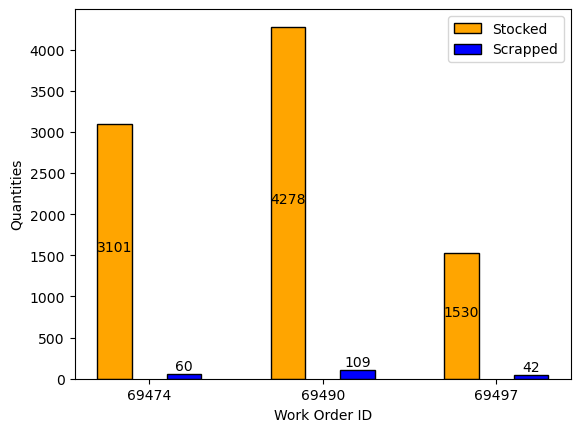

In [17]:
X = ['69474','69490','69497'] 

YStockedQty = [3101,4278,1530] 
ZScrappedQty = [60,109,42] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, YStockedQty,0.2, label = 'Stocked', edgecolor = 'black', color = 'orange') 
plt.bar(X_axis + 0.2, ZScrappedQty,0.2, label = 'Scrapped', edgecolor = 'black', color = 'b') 

def addlabels1(X,YStockedQty):
    for i in range(len(X)):
        plt.text(i -0.2 ,YStockedQty[i]//2,YStockedQty[i], ha = 'center')

def addlabels2(X,ZScrappedQty):
    for i in range(len(X)):
        plt.text(i + 0.2 ,ZScrappedQty[i] +50,ZScrappedQty[i], ha = 'center')

plt.xticks(X_axis, X) 
plt.xlabel("Work Order ID") 
plt.ylabel("Quantities") 
addlabels1(X,YStockedQty)
addlabels2(X,ZScrappedQty)
plt.legend() 
plt.show()


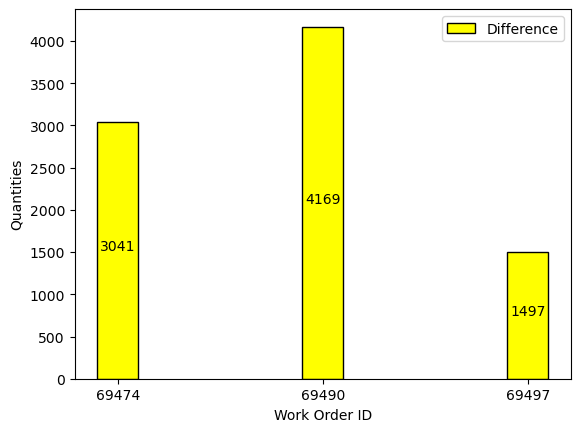

In [18]:
X = ['69474','69490','69497'] 

YDifferences = [3041,4169,1497] 

X_axis = np.arange(len(X)) 

  
plt.bar(X_axis, YDifferences ,0.2 , label = 'Difference', edgecolor = 'black', color = 'yellow' ) 

def addlabels(X,YDifferences):
    for i in range(len(X)):
        plt.text(i,YDifferences[i]//2,YDifferences[i], ha = 'center')

plt.xticks(X_axis, X) 
plt.xlabel("Work Order ID") 
plt.ylabel("Quantities") 
addlabels(X,YDifferences)
plt.legend()
plt.show() 

In [27]:
stocked = [3131, 4278, 1530]

x = np.mean(stocked)
var = np.var (stocked)
std = np.std(stocked)
print("The mean for stocked is" , int(x))
print('The variance for stocked is', int(var))
print("The standard deviation for stocked is" , int(std))

scrapped = [60, 109, 42]

x1 = np.mean(scrapped)
var1 = np.var (scrapped)
std1 = np.std(scrapped)
print("The mean for scrapped is" , int(x1))
print('The variance for scrapped is', int(var1))
print("The standard deviation for scrapped is" , int(std1))


difference = [3041, 4169, 1497]

x2 = np.mean(difference)
var2 = np.var(difference)
std2 = np.std(difference)
print("The mean for the difference is" , int(x2))
print('The variance for the difference is', int(var2))
print("The standard deviation for the difference is" , int(std2))

The mean for stocked is 2979
The variance for stocked is 1270034
The standard deviation for stocked is 1126
The mean for scrapped is 70
The variance for scrapped is 801
The standard deviation for scrapped is 28
The mean for the difference is 2902
The variance for the difference is 1199544
The standard deviation for the difference is 1095


In [28]:
gfg_data = [3131, 4278, 1530] 
  
# create 95% confidence interval of the stocked quantity
stats.t.interval(confidence=0.95, 
              df=len(gfg_data)-1, 
              loc=np.mean(gfg_data),  
              scale=stats.sem(gfg_data))

(-449.0304579557742, 6408.363791289107)

In [29]:
# create 95% confidence interval of the scrapped quantity
gfg_data = [60, 109, 42] 
  
stats.t.interval(confidence=0.95, 
              df=len(gfg_data)-1, 
              loc=np.mean(gfg_data),  
              scale=stats.sem(gfg_data))

(-15.803343326990188, 156.47000999365684)

In [30]:
# create 95% confidence interval of the differences 
gfg_data = [3041, 4169, 1497] 
  
stats.t.interval(confidence=0.95, 
              df=len(gfg_data)-1, 
              loc=np.mean(gfg_data),  
              scale=stats.sem(gfg_data)) 

(-429.85507871223354, 6234.521745378901)

In [31]:
# create 95% confidence interval of the means which is rounded up
gfg_data = [2980, 70, 2902] 
  
stats.t.interval(confidence=0.95, 
              df=len(gfg_data)-1, 
              loc=np.mean(gfg_data),  
              scale=stats.sem(gfg_data)) 

(-2134.7782357298765, 6102.7782357298765)

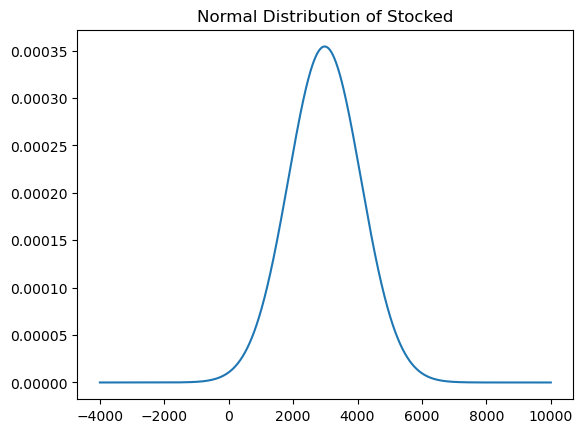

In [32]:
from scipy.stats import norm
import statistics

x_axis = np.arange(-4000, 10000, 0.01)


mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
  
plt.plot(x_axis, norm.pdf(x_axis,2979, 1126)) 
plt.title("Normal Distribution of Stocked")
plt.show()

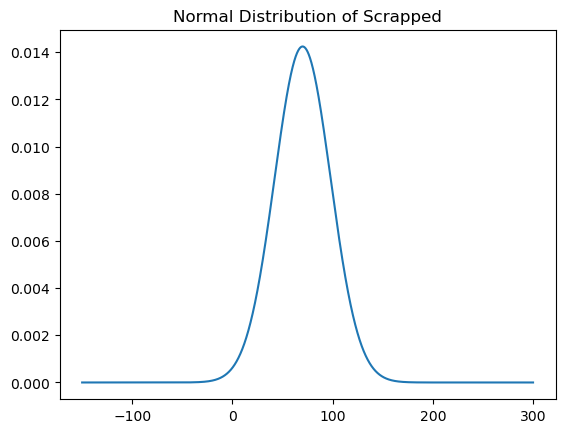

In [33]:
x_axis = np.arange(-150, 300, 0.01)


mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
  
plt.plot(x_axis, norm.pdf(x_axis,70,28)) 
plt.title("Normal Distribution of Scrapped")
plt.show()


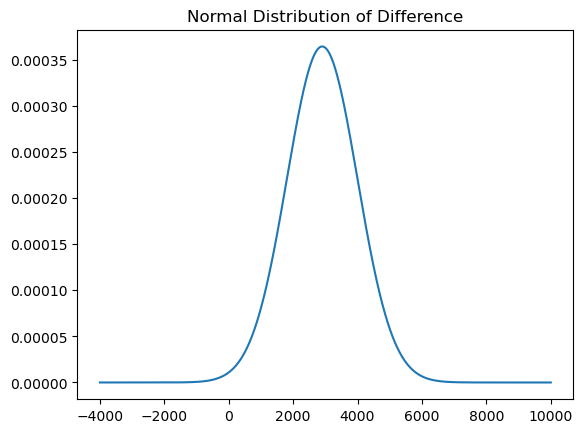

In [34]:
x_axis = np.arange(-4000, 10000, 0.01)


mean = statistics.mean(x_axis) 
sd = statistics.stdev(x_axis) 
  
plt.plot(x_axis, norm.pdf(x_axis,2902, 1095))
plt.title("Normal Distribution of Difference")
plt.show()